# GLM via SKLearn

Please email: Joshua_Zimmer@hms.harvard.edu with questions

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('./backend')

import sglm
import sglm_cv
import sklearn.linear_model
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

# Normal (OLS)

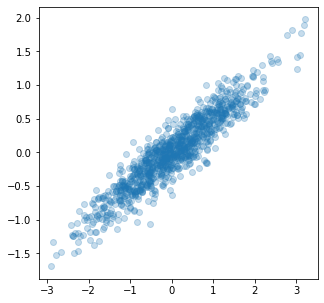

In [3]:
norm = stats.norm()

true_x = norm.rvs(size=1000)
true_y = true_x * 0.5
obs_y = (true_y + norm.rvs(size=1000)*0.2)

x = true_x[:,None]
y = obs_y

plt.figure(figsize=(5,5))
plt.scatter(x, y, alpha = 0.25)

In [4]:
# glm = sglm.GLM('Normal')
# glm = sklearn.linear_model.LinearRegression()
glm = sglm.GLM('Normal', alpha=0)
glm.fit(x, y)
coef, intercept = glm.coef_, glm.intercept_
coef, intercept

(array([0.45956885]), 0.0030057491038823075)

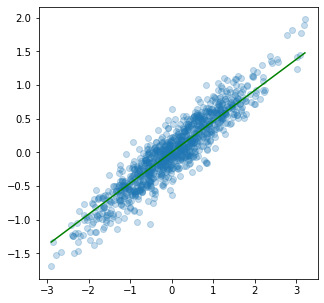

In [5]:
view_x = np.linspace(x.min(), x.max(), num=100)
view_y = view_x*coef + intercept
obs_y = (true_y + norm.rvs(size=1000)*0.)

plt.figure(figsize=(5,5))
plt.scatter(x[:,0], y, alpha = 0.25)
plt.plot(view_x, np.squeeze(view_y), color='g')

# Poisson

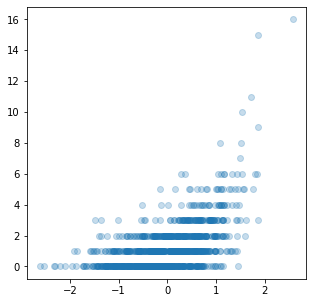

In [6]:
true_x = np.array(sorted(norm.rvs(size=1000)*.75))
true_y = np.exp(true_x)
obs_y = np.array([stats.poisson(mu=np.exp(_)).rvs(1) for _ in true_x]).reshape(-1)

x = true_x[:,None]
y = obs_y

plt.figure(figsize=(5,5))
plt.scatter(x, y, alpha = 0.25)

In [7]:
# glm = sglm.GLM('Poisson', alpha=0, link='identity')
glm = sglm.GLM('Poisson', reg_lambda=0)
glm.fit(x, y)
coef, intercept = glm.coef_, glm.intercept_
coef, intercept

(array([0.96130272]), 0.008145868641121053)

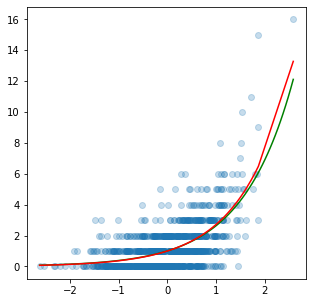

In [8]:
view_x = np.linspace(x.min(), x.max(), num=100)
view_y = np.exp(view_x*coef + intercept)
# view_y = view_x*coef + intercept

plt.figure(figsize=(5,5))
plt.scatter(x[:,0], y, alpha = 0.25)
plt.plot(view_x, np.squeeze(view_y), color='g')
plt.plot(true_x, np.squeeze(true_y), color='r')

# Logistic

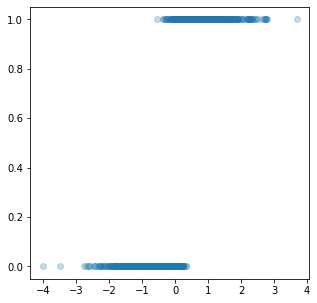

In [9]:
norm = stats.norm()

true_x = norm.rvs(size=1000)
true_y = true_x * 0.5
obs_y = ((true_y + norm.rvs(size=1000)*0.1) > 0)*1.0

x = true_x[:,None]
y = obs_y

plt.figure(figsize=(5,5))
plt.scatter(x, y, alpha = 0.25)

In [10]:
glm = sglm.GLM('Logistic', reg_lambda=0)
glm.fit(x, y)
coef, intercept = glm.coef_, glm.intercept_
coef, intercept

/Users/josh/opt/anaconda3/lib/python3.8/site-packages/pyglmnet/pyglmnet.py:863: UserWarning: Reached max number of iterations without convergence.
  warnings.warn(


(array([6.00584792]), -0.10100048437160589)

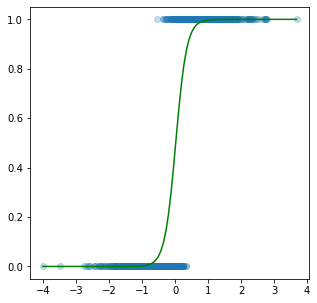

In [11]:
view_x = np.linspace(x.min(), x.max(), num=100)
view_y = 1/(1+np.exp(-(view_x*coef + intercept)))

plt.figure(figsize=(5,5))
plt.scatter(x[:,0], y, alpha = 0.25)
plt.plot(view_x, np.squeeze(view_y), color='g')

# Normal (OLS) - CV

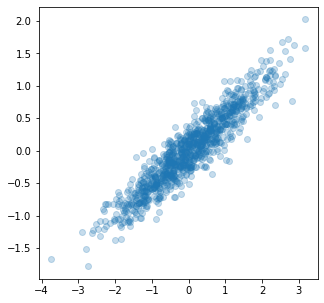

In [12]:
norm = stats.norm()

true_x = norm.rvs(size=1000)
true_y = true_x * 0.5
obs_y = (true_y + norm.rvs(size=1000)*0.2)

x = true_x[:,None]
y = obs_y

plt.figure(figsize=(5,5))
plt.scatter(x, y, alpha = 0.25)

In [13]:
import sklearn.model_selection

ss = sklearn.model_selection.ShuffleSplit()

In [14]:
# for sss in ss.split(x, y):
#     for isss in sss:
#         print(isss.shape)
#     break

inx = list(ss.split(x, y))

In [15]:
inx

[(array([  5, 461, 402, 358, 565, 470, 964, 418, 861, 220, 233, 128, 779,
         872, 966, 546, 931, 455, 278, 243,  10, 540, 970,  83, 386, 989,
          20, 421, 842,  34, 609, 822, 496, 733, 580, 821, 533, 443, 700,
         693,  24, 744,  91, 587, 390, 719, 271, 379, 947, 788, 171, 843,
         315, 681, 786,   6, 415, 230, 717,   9, 813, 449, 471,  73, 330,
          53, 655, 313, 221, 600,  90, 501, 112, 477, 277, 637, 193,  78,
         992, 738, 591, 163, 409, 295, 155, 978, 294, 145, 448, 391, 720,
         712, 799, 131, 514, 999, 378, 882, 946, 108, 551, 200, 818, 536,
          76, 214, 729, 589, 575, 937,  16, 758, 262, 468, 962, 416, 945,
         727, 362, 178, 159, 116, 795, 556, 569, 981, 995, 577, 228,  18,
         920, 430, 135, 933, 459, 265, 734, 239, 157, 844, 348,  23, 680,
         619,  35, 617, 770, 682, 725,  33, 792, 413, 912, 137, 376, 555,
         506, 761, 859, 618, 411, 205, 869, 888, 613, 718, 710, 620, 375,
         397, 694,  13, 354, 328, 266,

In [16]:

# glm = sglm.GLM('Normal', alpha=0)
# glm.fit(x, y)

sglm_cv.cv_glm_single_params(x, y, inx, 'Gaussian', {'alpha': 0})



(array([[0.46340332, 0.45836876, 0.46196805, 0.46377212, 0.46520782,
         0.46365916, 0.46285889, 0.46041424, 0.4603    , 0.46459712]]),
 array([-7.28938209e-04,  2.13663730e-03,  1.82629872e-04,  5.04925237e-06,
        -1.15392804e-03,  6.78636374e-05, -1.86134033e-03, -2.12868930e-03,
        -2.13405901e-03, -2.04213656e-03]),
 array([39.63297465, 40.26835539, 39.58886495, 39.38834363, 38.68701217,
        38.34198804, 38.62260698, 40.15365059, 39.01525203, 39.11683674]),
 array([3.76884987, 3.62538915, 3.94577737, 3.97896738, 4.55416087,
        5.03556256, 4.8329477 , 3.5369964 , 4.68668168, 4.18145258]))

In [17]:

param_list = sglm_cv.generate_mult_params(
                                          {
                                           'alpha': [0,0.01,0.1,1],
                                           'roll': [0,1,2,3,4]
                                          },
                                          kwargs={'fit_intercept': True}
                                         )



In [18]:
param_list

[{'fit_intercept': True, 'alpha': 0, 'roll': 0},
 {'fit_intercept': True, 'alpha': 0, 'roll': 1},
 {'fit_intercept': True, 'alpha': 0, 'roll': 2},
 {'fit_intercept': True, 'alpha': 0, 'roll': 3},
 {'fit_intercept': True, 'alpha': 0, 'roll': 4},
 {'fit_intercept': True, 'alpha': 0.01, 'roll': 0},
 {'fit_intercept': True, 'alpha': 0.01, 'roll': 1},
 {'fit_intercept': True, 'alpha': 0.01, 'roll': 2},
 {'fit_intercept': True, 'alpha': 0.01, 'roll': 3},
 {'fit_intercept': True, 'alpha': 0.01, 'roll': 4},
 {'fit_intercept': True, 'alpha': 0.1, 'roll': 0},
 {'fit_intercept': True, 'alpha': 0.1, 'roll': 1},
 {'fit_intercept': True, 'alpha': 0.1, 'roll': 2},
 {'fit_intercept': True, 'alpha': 0.1, 'roll': 3},
 {'fit_intercept': True, 'alpha': 0.1, 'roll': 4},
 {'fit_intercept': True, 'alpha': 1, 'roll': 0},
 {'fit_intercept': True, 'alpha': 1, 'roll': 1},
 {'fit_intercept': True, 'alpha': 1, 'roll': 2},
 {'fit_intercept': True, 'alpha': 1, 'roll': 3},
 {'fit_intercept': True, 'alpha': 1, 'roll':

In [19]:
sglm_cv.cv_glm_mult_params(x, y, inx, 'Gaussian', param_list)

[(array([[0.46340332, 0.45836876, 0.46196805, 0.46377212, 0.46520782,
          0.46365916, 0.46285889, 0.46041424, 0.4603    , 0.46459712]]),
  array([-7.28938209e-04,  2.13663730e-03,  1.82629872e-04,  5.04925237e-06,
         -1.15392804e-03,  6.78636374e-05, -1.86134033e-03, -2.12868930e-03,
         -2.13405901e-03, -2.04213656e-03]),
  array([39.63297465, 40.26835539, 39.58886495, 39.38834363, 38.68701217,
         38.34198804, 38.62260698, 40.15365059, 39.01525203, 39.11683674]),
  array([3.76884987, 3.62538915, 3.94577737, 3.97896738, 4.55416087,
         5.03556256, 4.8329477 , 3.5369964 , 4.68668168, 4.18145258])),
 (array([[0.00849888, 0.01295319, 0.00250234, 0.01362135, 0.01710814,
          0.02079329, 0.00995924, 0.02340851, 0.00868541, 0.00708508]]),
  array([ 0.00431551,  0.0089644 ,  0.01760242,  0.01320293,  0.00590659,
          0.01687651, -0.00108637,  0.01353507,  0.01211879,  0.01569518]),
  array([296.10635931, 291.14583277, 298.76092044, 290.73977619,
         

# Preprocessing